# <center>__Assignment 2__ </center>

## <center>__Ben Karabinus__</center>

## <center>__COMP 4432, Summer Quarter 2022__</center>



In [90]:
"""load the necessary packages"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

## *Part 1: Data Exploration*

Objectives

- Load diabetes data from scikit-learn, assign to variable and print dataset dercription
- Load the diabetes features into a dataframe with proper column names, add the target feature to the dataframe
- Check data types for features in the diabetes data, check for missing data
- Print descriptive statistics for numeric features
- Plot data distribution (histogram)
- Split data into training and test sets (80/20)
- Create a correlation matrix from dataset features
- Plot the correlation matrix as Seaborn heatmap
- Create a Seaborn pairplot (type=scatter) of the three features with the highest target correlation
- Prepare a feature set by dropping the target from training data and assigning to a new dataframe 

In [77]:
"""load diabetes dataset from scikit-learn and print dataset description"""

diabetes_bunch = data.load_diabetes(as_frame=True)
print(diabetes_bunch['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Note: Intuitively it seems "sex" would be a categorical feature, but the dataset description specifies it as a numeric feature and it has been scaled similar to other features in the data. As such it will be treated in a similar fashion for the purpose of this analysis.

In [5]:
"""Load the diabetes featrues into a dataframe with proper column names, add the target feature to"""

diabetes_df = diabetes_bunch['data']
diabetes_df['disease_progression'] = diabetes_bunch['target']

In [6]:
"""Check data types for features in the diabetes data, check for missing data"""
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1                   442 non-null    float64
 5   s2                   442 non-null    float64
 6   s3                   442 non-null    float64
 7   s4                   442 non-null    float64
 8   s5                   442 non-null    float64
 9   s6                   442 non-null    float64
 10  disease_progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [12]:
"""
print descriptive statistics for numeric features
note all features have been scaled by default
"""

pd.set_option('display.float_format', lambda x : '%.5f' % x)
diabetes_df.agg(func=['min', 'median', 'max', 'mean', 'var', 'std',
                      'skew', 'kurt'])

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
min,-0.10723,-0.04464,-0.09028,-0.11240,-0.12678,-0.11561,-0.10231,-0.07639,-0.12610,-0.13777,25.00000
median,0.00538,-0.04464,-0.00728,-0.00567,-0.00432,-0.00382,-0.00658,-0.00259,-0.00195,-0.00108,140.50000
max,0.11073,0.05068,0.17056,0.13204,0.15391,0.19879,0.18118,0.18523,0.13360,0.13561,346.00000
mean,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,152.13348
var,0.00227,0.00227,0.00227,0.00227,0.00227,0.00227,0.00227,0.00227,0.00227,0.00227,5943.33135
std,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,77.09300
skew,-0.23138,0.12738,0.59815,0.29066,0.37811,0.43659,0.79926,0.73537,0.29175,0.20792,0.44056
kurt,-0.67122,-1.99281,0.09509,-0.53280,0.23295,0.60138,0.98151,0.44440,-0.13437,0.23692,-0.88306


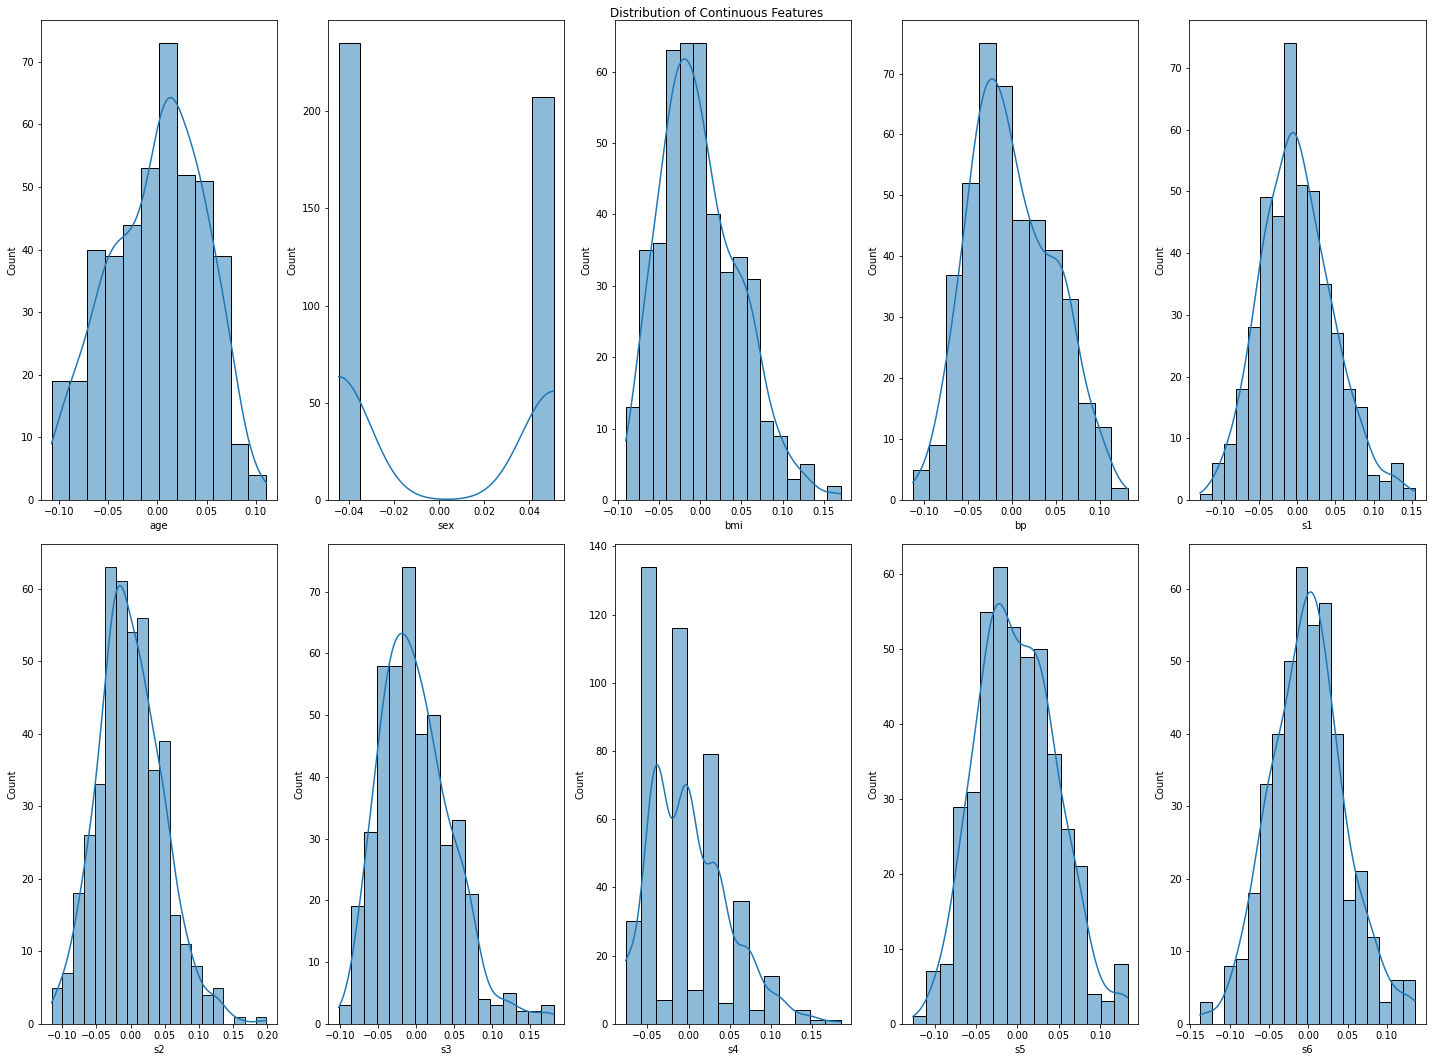

In [36]:
"""Plot data distribution (histogram) features"""


fig, axs = plt.subplots(2, 5, figsize=(20, 15))
sns.histplot(data=diabetes_df, x="age", kde=True, ax=axs[0, 0])
sns.histplot(data=diabetes_df, x="sex", kde=True, ax=axs[0, 1])
sns.histplot(data=diabetes_df, x="bmi", kde=True, ax=axs[0, 2])
sns.histplot(data=diabetes_df, x="bp", kde=True, ax=axs[0, 3])
sns.histplot(data=diabetes_df, x="s1", kde=True, ax=axs[0, 4])
sns.histplot(data=diabetes_df, x="s2", kde=True, ax=axs[1, 0])
sns.histplot(data=diabetes_df, x="s3", kde=True, ax=axs[1, 1])
sns.histplot(data=diabetes_df, x="s4", kde=True, ax=axs[1, 2])
sns.histplot(data=diabetes_df, x="s5", kde=True, ax=axs[1, 3])
sns.histplot(data=diabetes_df, x="s6", kde=True, ax=axs[1, 4])
fig.suptitle('Distribution of Continuous Features')
plt.tight_layout()

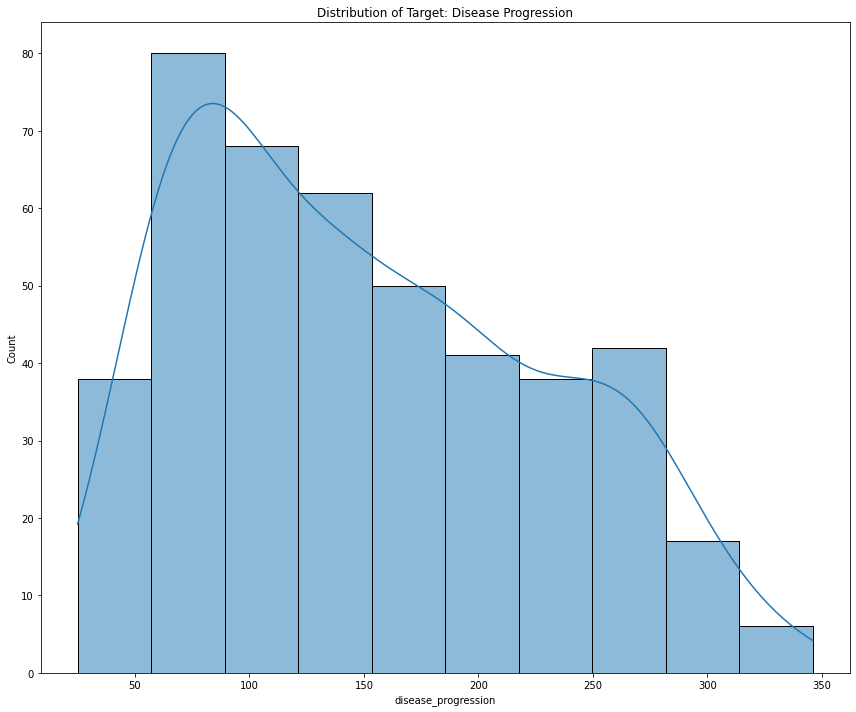

In [37]:
"""plot distribution of target feature (histogram)"""

fig, ax = plt.subplots(figsize=(12, 10))
sns.histplot(data=diabetes_df, x='disease_progression', kde=True)
plt.title('Distribution of Target: Disease Progression')
plt.tight_layout()

In [40]:
"""split the data into training and test sets"""

train, test = train_test_split(diabetes_df, test_size=.20, shuffle=True, random_state=14)

In [57]:
"""create a correlation matrix from the training data"""

train_corr = train.corr()

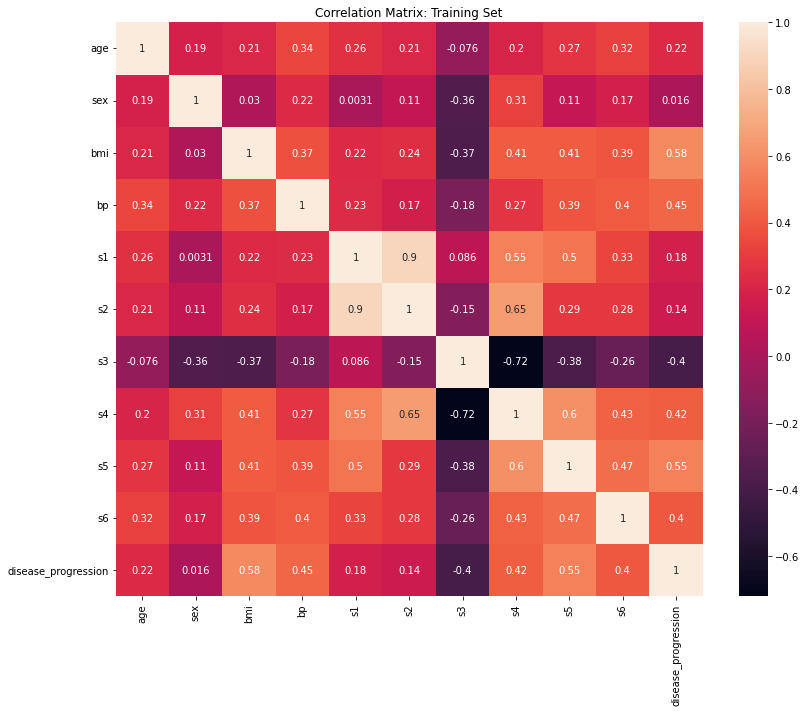

In [59]:
"""plot correlation heatmap training data"""

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(train_corr, annot=True)
plt.title('Correlation Matrix: Training Set')
plt.tight_layout()

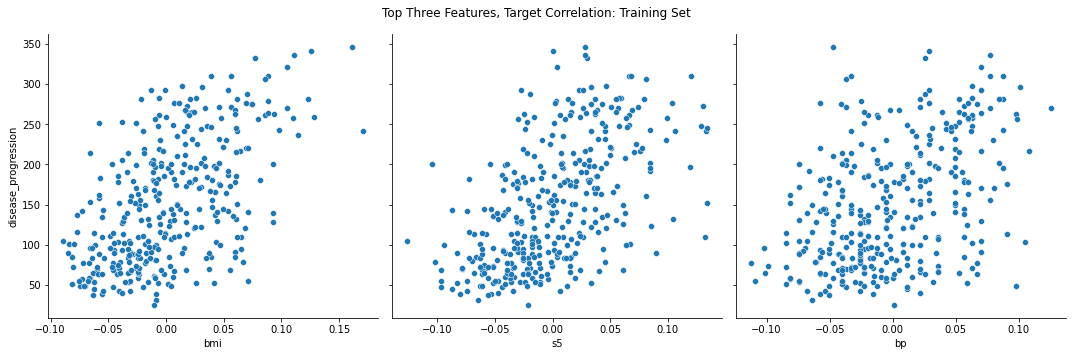

In [74]:
"""sns pairplot for 3 features with highest target correlation, training set"""

three_best = train_corr.loc['disease_progression'][0:10].sort_values(ascending=False)[0:3].index
sns.pairplot(train, x_vars=three_best, y_vars=['disease_progression'],
             height=5.0).fig.suptitle("Top Three Features, Target Correlation: Training Set")
plt.tight_layout()


In [44]:
"""create a correlation matrix from the test data"""

test_corr = test.corr()
test_corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
age,1.00000,0.12669,0.06894,0.34420,0.29434,0.25217,-0.06591,0.21183,0.27285,0.24759,0.05822
sex,0.12669,1.00000,0.32660,0.31128,0.21053,0.33777,-0.45910,0.42810,0.32991,0.33446,0.14562
bmi,0.06894,0.32660,1.00000,0.50584,0.40964,0.36350,-0.34377,0.40862,0.58359,0.40425,0.64490
bp,0.34420,0.31128,0.50584,1.00000,0.33558,0.28189,-0.19754,0.21286,0.43996,0.34740,0.41754
s1,0.29434,0.21053,0.40964,0.33558,1.00000,0.87883,-0.12302,0.53960,0.63428,0.31428,0.39807
s2,0.25217,0.33777,0.36350,0.28189,0.87883,1.00000,-0.45952,0.72044,0.50475,0.33888,0.34004
s3,-0.06591,-0.45910,-0.34377,-0.19754,-0.12302,-0.45952,1.00000,-0.80979,-0.48192,-0.33896,-0.37829
s4,0.21183,0.42810,0.40862,0.21286,0.53960,0.72044,-0.80979,1.00000,0.68759,0.37201,0.47727
s5,0.27285,0.32991,0.58359,0.43996,0.63428,0.50475,-0.48192,0.68759,1.00000,0.43306,0.64678
s6,0.24759,0.33446,0.40425,0.34740,0.31428,0.33888,-0.33896,0.37201,0.43306,1.00000,0.31901


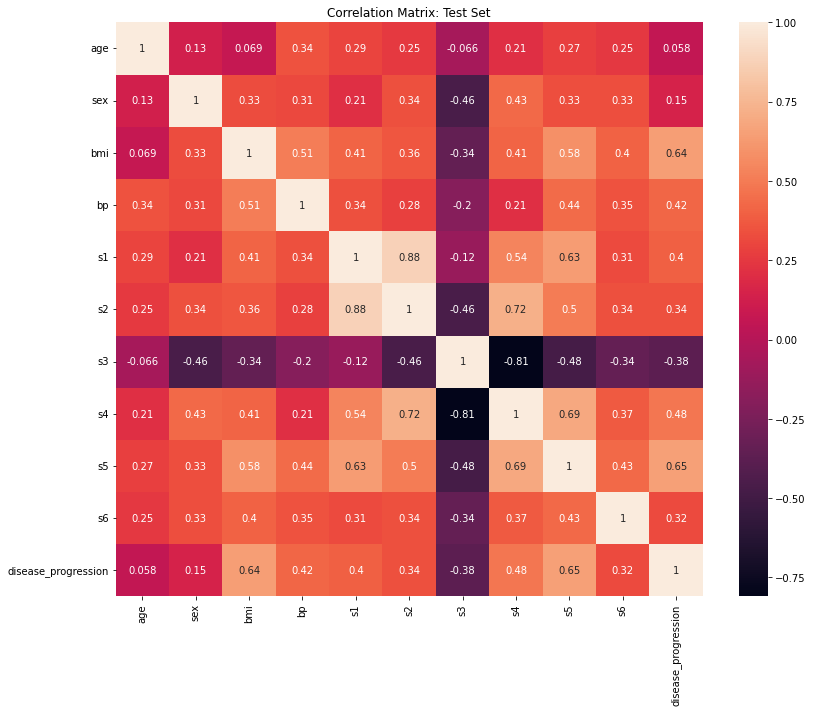

In [60]:
"""plot correlation heatmap test data"""

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(test_corr, annot=True)
plt.title('Correlation Matrix: Test Set')
plt.tight_layout()

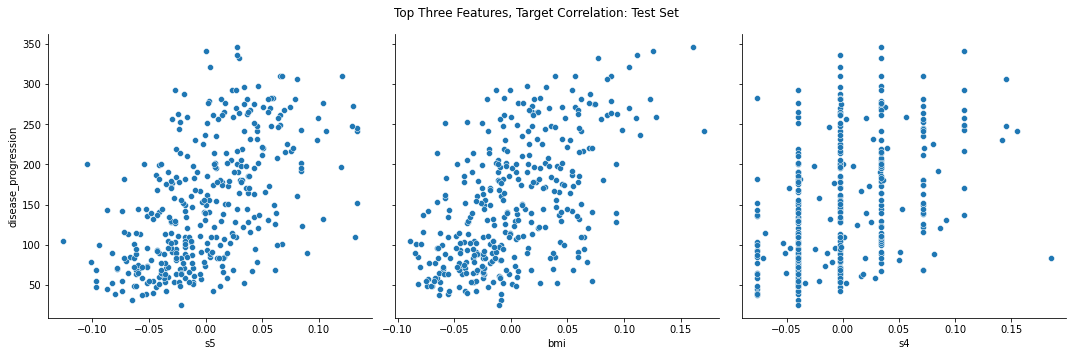

In [75]:
"""sns pairplot for 3 features with highest target correlation, training set"""

three_best = test_corr.loc['disease_progression'][0:10].sort_values(ascending=False)[0:3].index
sns.pairplot(train, x_vars=three_best, y_vars=['disease_progression'],
             height=5.0).fig.suptitle("Top Three Features, Target Correlation: Test Set")
plt.tight_layout()

In [76]:
"""Split target from feature set training data"""

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1:]

## *Part 2: Model Training*

Objectives

- Train a linear regression model using the training set, print RMSE of regression model applied to training set
- Implement a cross_val_score on a decision tree regressor applied to the training set
- Print out root mean and standard deviation of the cross validation scores for decision tree regressor
- Implement a cross_val_score on a RandomForestRegressor applied to the training set
- Print out root mean and standard deviation of the cross validation scores for RandomForestRegressor
- Record which model perfoms best

In [109]:
"""
instantiate a linear regression model and fit it to the training data
print the root mean squared error of fit model applied to training data
"""
ols = LinearRegression()
ols.fit(X_train, y_train)
predictions = ols.predict(X_train)
rmse = mean_squared_error(y_train, predictions, squared=False)
print("Root Mean Squared Error: {:.4f}".format(rmse))

Root Mean Squared Error: 53.3073


In [103]:
"""Implement a cross_val_score on a decision tree regressor applied to the training set"""

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
cross_val = cross_val_score(dtr, X_train, y_train, scoring ='neg_mean_squared_error', cv=10)
dtr_cv_score = np.sqrt(-cross_val)

In [104]:
"""print root mean of cross validation scores, decision tree regressor"""

print("Mean of mean squared error for cross validation scores: {:.4f} ".format(dtr_cv_score.mean()))

Mean of mean squared error for cross validation scores: 76.4229 


In [105]:
"""print standard deviation of cross validation scores, decision tree regressor"""

print("Standard deviation of cross validation scores: {:.4f} ".format(dtr_cv_score.std()))

Standard deviation of cross validation scores: 6.1634 


In [106]:
"""Implement a cross_val_score on a RandomForestRegressor applied to the training set"""
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train.to_numpy().ravel())
cross_val = cross_val_score(rfr, X_train,y_train.to_numpy().ravel(), scoring ='neg_mean_squared_error', cv=10)
rfr_cv_score = np.sqrt(-cross_val)

In [107]:
"""print root mean of cross validation scores, random forest regressor"""

print("Mean of mean squared error for cross validation scores: {:.4f} ".format(rfr_cv_score.mean()))

Mean of mean squared error for cross validation scores: 57.3997 


In [108]:
"""print standard deviation of cross validation scores, random forest regressor"""

print("Standard deviation of cross validation scores: {:.4f} ".format(rfr_cv_score.std()))

Standard deviation of cross validation scores: 4.8154 


Of the three models fit and applied to the training set the ordinary least squares regression model with no cross validation performed best with root mean squared error of approximately 53.3073.